In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [40]:
df = pd.read_csv('results.csv', sep=';')
df.head()

,Name,OriginalSize,BxesSize,BxesPreprocessing,ZipSize,BxesToXesSize,ExiSize
0,CCC19 - Log XES,806604,21732,21166,26474,784533,21653
1,not_existing_assembly_loading_50,69765356,1398690,1370231,3031019,68701568,1496488
2,finalizable_object_1,885275,33793,33490,33805,844702,28344
3,exception_try_catch_finally_when_1,620798,31017,30979,30622,607637,25040
4,unsafe_fixed_50,24518888,414890,404778,1132204,23971780,535439


In [41]:
def test_hypothesis(df: pd.DataFrame):
    x = [x for x in range(len(df['BxesSize'].to_numpy()))]
    
    bxes_line = df['OriginalSize'].to_numpy() / df['BxesSize'].to_numpy()
    bxes_preprocessing = df['OriginalSize'].to_numpy() / df['BxesPreprocessing'].to_numpy()
    exi = df['OriginalSize'].to_numpy() / df['ExiSize'].to_numpy()
    
    plt.plot(x, bxes_preprocessing, label='BxesPreprocessing')
    plt.plot(x, bxes_line, label='Bxes', linestyle='--')
    plt.plot(x, exi, label='Exi', linestyle=':')
    plt.legend()
    plt.show()
    
    plt.plot(x, df['OriginalSize'], label='OriginalSize')
    plt.plot(x, df['BxesToXesSize'], label='BxesToXesSize')
    plt.legend()
    plt.show()

    print(f'Exi-BxesPreprocessing {scipy.stats.ttest_rel(exi, bxes_preprocessing)}')
    print(f'Exi-Bxes {scipy.stats.ttest_rel(exi, bxes_line)}')
    print(f'Bxes mean: {np.mean(bxes_line)}')
    print(f'BxesPreprocessing mean: {np.mean(bxes_preprocessing)}')
    print(f'Exi: {np.mean(exi)}')
    

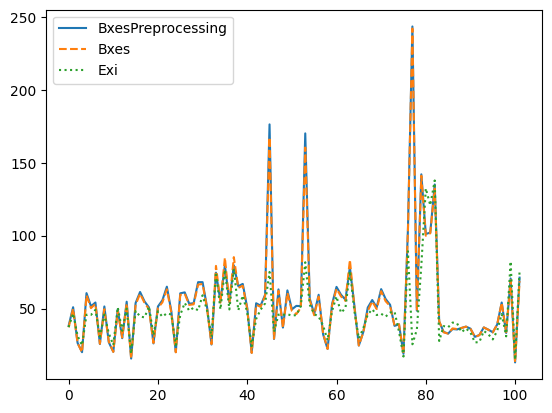

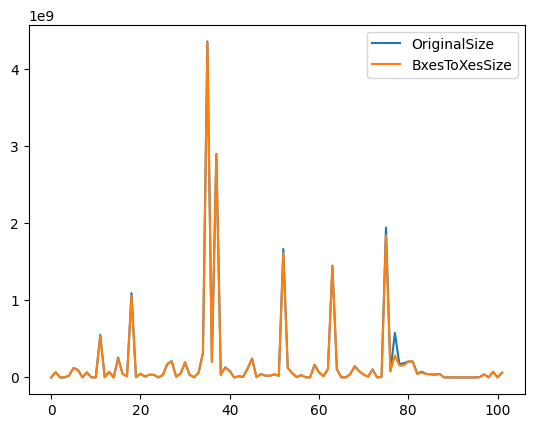

Exi-BxesPreprocessing TtestResult(statistic=-2.8197427040041143, pvalue=0.005785435236908417, df=101)
Exi-Bxes TtestResult(statistic=-2.627485037440319, pvalue=0.009942513429837879, df=101)
Bxes mean: 54.08897308594085
BxesPreprocessing mean: 54.77542649241584
Exi: 47.36671226539508


In [42]:
test_hypothesis(df)

In [43]:
def test_hypothesis_filtered_df(df, predicate):
    filter_result = df.apply(predicate, axis=1)
    df = df[filter_result]
    print(df['Name'].unique())
    test_hypothesis(df)

['not_existing_assembly_loading_50' 'finalizable_object_1'
 'exception_try_catch_finally_when_1' 'unsafe_fixed_50' 'array_pooling_75'
 'task_test_project_50' 'dynamic_assembly_loading_1'
 'finalizable_object_75' 'simple_async_await_1' 'console_app_1_1'
 'intensive_thread_pool_25' 'file_async_operations_1'
 'dynamic_assembly_loading_50' 'exception_try_catch_finally_1'
 'not_simple_async_await_75' 'console_app_1_75'
 'exception_try_catch_finally_when_25' 'intensive_thread_pool_50'
 'exception_try_catch_finally_async_1' 'task_test_project_25'
 'unsafe_fixed_25' 'yield_enumerator_75'
 'not_existing_assembly_loading_25' 'unsafe_fixed_1'
 'exception_try_catch_finally_when_50' 'simple_async_await_75'
 'exception_try_catch_finally_async_75' 'exception_try_catch_finally_75'
 'file_write_project_75' 'dynamic_assembly_creation_75'
 'dynamic_assembly_loading_25' 'task_test_project_1' 'loh_allocations_1'
 'file_async_operations_75' 'loh_allocations_75'
 'file_async_operations_50' 'loh_allocations_5

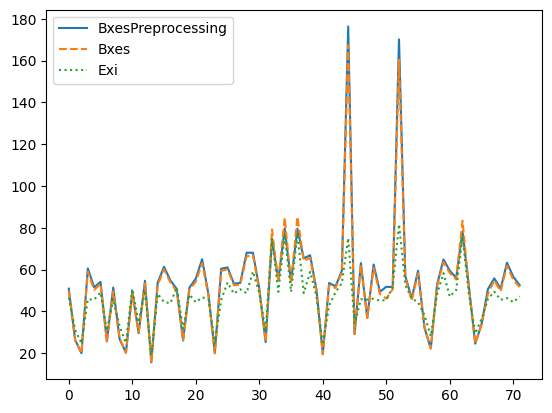

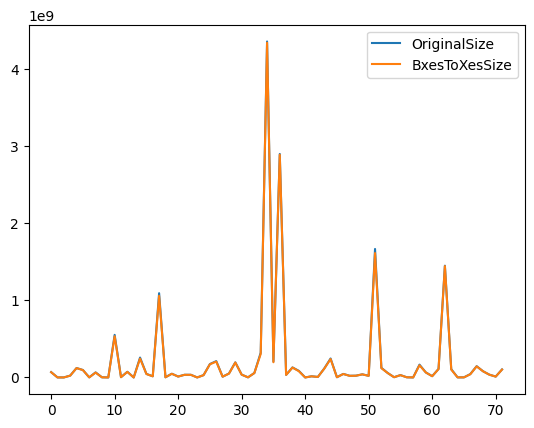

Exi-BxesPreprocessing TtestResult(statistic=-3.424078902391073, pvalue=0.0010282350786051243, df=71)
Exi-Bxes TtestResult(statistic=-3.3080066146336264, pvalue=0.001477245990384462, df=71)
Bxes mean: 52.476933732287584
BxesPreprocessing mean: 53.28082857542714
Exi: 46.57586460417308


In [44]:
def all_procfiler_logs_predicate(row):
    return ('_1' in row['Name'] or '_25' in row['Name'] or '_50' in row['Name'] or '_75' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, all_procfiler_logs_predicate)

['finalizable_object_1' 'exception_try_catch_finally_when_1'
 'dynamic_assembly_loading_1' 'simple_async_await_1' 'console_app_1_1'
 'file_async_operations_1' 'exception_try_catch_finally_1'
 'console_app_1_75' 'exception_try_catch_finally_async_1' 'unsafe_fixed_1'
 'task_test_project_1' 'loh_allocations_1' 'yield_enumerator_1'
 'console_app_1_25' 'not_simple_async_await_1' 'intensive_thread_pool_1'
 'console_app_1_50' 'dynamic_assembly_creation_1' 'file_write_project_1'
 'not_existing_assembly_loading_1' 'array_pooling_1']


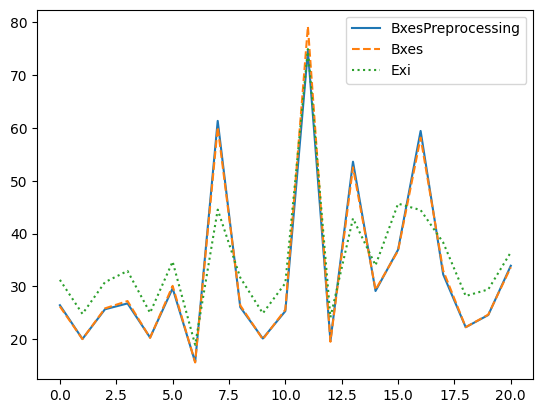

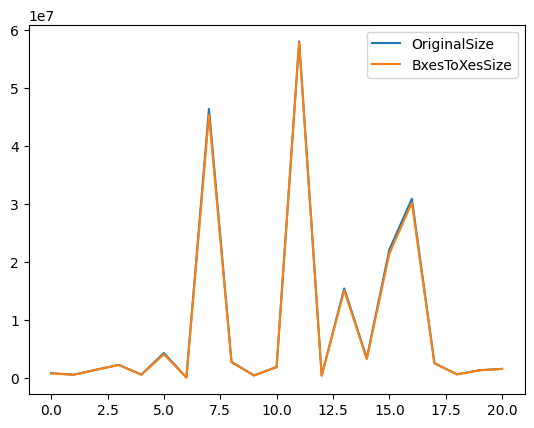

Exi-BxesPreprocessing TtestResult(statistic=1.3816340806568872, pvalue=0.1823245625104276, df=20)
Exi-Bxes TtestResult(statistic=1.357561227358446, pvalue=0.18972478886916885, df=20)
Bxes mean: 32.69064596048471
BxesPreprocessing mean: 32.56260912917501
Exi: 34.69385335785272


In [45]:
def one_repeat_procfiler_logs_predicate(row):
    return ('_1' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, one_repeat_procfiler_logs_predicate)

['intensive_thread_pool_25' 'exception_try_catch_finally_when_25'
 'task_test_project_25' 'unsafe_fixed_25'
 'not_existing_assembly_loading_25' 'dynamic_assembly_loading_25'
 'not_simple_async_await_25' 'console_app_1_25' 'array_pooling_25'
 'finalizable_object_25' 'exception_try_catch_finally_async_25'
 'simple_async_await_25' 'exception_try_catch_finally_25'
 'dynamic_assembly_creation_25' 'file_write_project_25'
 'loh_allocations_25' 'file_async_operations_25' 'yield_enumerator_25']


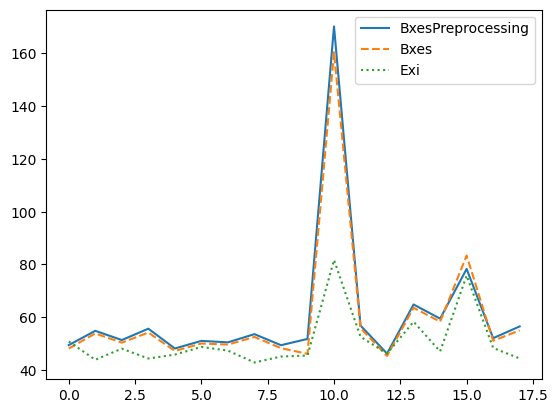

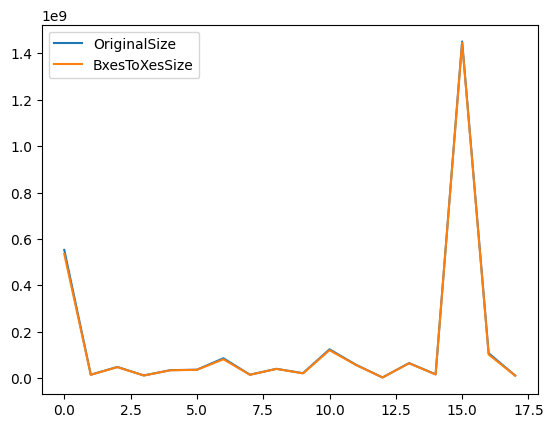

Exi-BxesPreprocessing TtestResult(statistic=-2.160020667390395, pvalue=0.045343984661089846, df=17)
Exi-Bxes TtestResult(statistic=-2.0495745008730863, pvalue=0.056160755695409244, df=17)
Bxes mean: 59.65397723887467
BxesPreprocessing mean: 61.140344715822984
Exi: 50.96406131018077


In [46]:
def one_repeat_procfiler_logs_predicate(row):
    return ('_25' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, one_repeat_procfiler_logs_predicate)

['not_existing_assembly_loading_50' 'unsafe_fixed_50'
 'task_test_project_50' 'dynamic_assembly_loading_50'
 'intensive_thread_pool_50' 'exception_try_catch_finally_when_50'
 'file_async_operations_50' 'loh_allocations_50' 'file_write_project_50'
 'dynamic_assembly_creation_50' 'exception_try_catch_finally_50'
 'simple_async_await_50' 'exception_try_catch_finally_async_50'
 'yield_enumerator_50' 'console_app_1_50' 'not_simple_async_await_50'
 'finalizable_object_50' 'array_pooling_50']


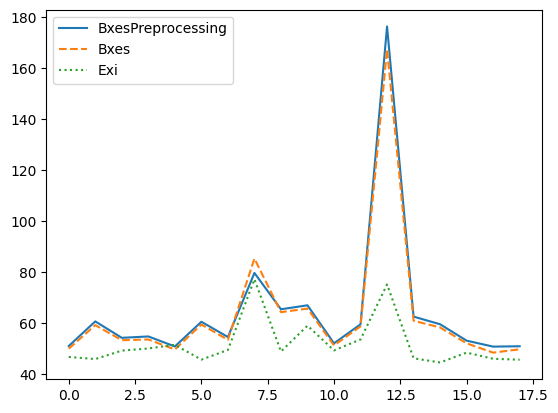

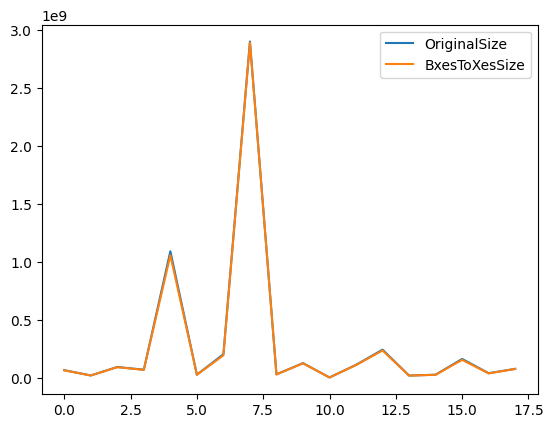

Exi-BxesPreprocessing TtestResult(statistic=-2.3998598933704858, pvalue=0.02813445875928455, df=17)
Exi-Bxes TtestResult(statistic=-2.3610463168542046, pvalue=0.03042636885626316, df=17)
Bxes mean: 63.28282361752705
BxesPreprocessing mean: 64.54776618411789
Exi: 51.70467570788716


In [47]:
def one_repeat_procfiler_logs_predicate(row):
    return ('_50' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, one_repeat_procfiler_logs_predicate)

['array_pooling_75' 'finalizable_object_75' 'not_simple_async_await_75'
 'console_app_1_75' 'yield_enumerator_75' 'simple_async_await_75'
 'exception_try_catch_finally_async_75' 'exception_try_catch_finally_75'
 'file_write_project_75' 'dynamic_assembly_creation_75'
 'file_async_operations_75' 'loh_allocations_75'
 'exception_try_catch_finally_when_75' 'intensive_thread_pool_75'
 'dynamic_assembly_loading_75' 'task_test_project_75' 'unsafe_fixed_75'
 'not_existing_assembly_loading_75']


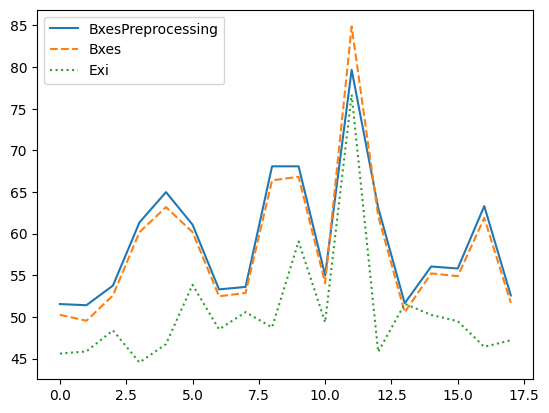

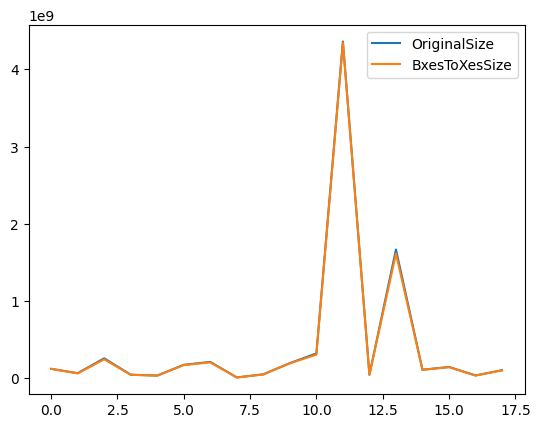

Exi-BxesPreprocessing TtestResult(statistic=-6.023028350470418, pvalue=1.3703969668744673e-05, df=17)
Exi-Bxes TtestResult(statistic=-5.776340368385429, pvalue=2.23547182802028e-05, df=17)
Bxes mean: 58.32723053149899
BxesPreprocessing mean: 59.13534785624793
Exi: 50.48498811534526


In [48]:
def one_repeat_procfiler_logs_predicate(row):
    return ('_75' in row['Name']) and 'BPI' not in row['Name']

test_hypothesis_filtered_df(df, one_repeat_procfiler_logs_predicate)